In [133]:
import pandas as pd

# Q1
# a) Read the csv file (Bank.csv in Canvas) as Pandas DataFrame

url = 'https://github.com/lc0312/COSC502/blob/main/Bank.csv?raw=true'
bank_df = pd.read_csv(url)

In [134]:
# b) Consider the ‘Personal Loan’ as class (Y) variable and all other columns (Ignore the ID and Zipcode columns) as X variable.

Y_data = bank_df['Personal Loan']
X_data = bank_df.drop(['ID','ZIP Code','Personal Loan'], axis=1)

In [135]:
# c) Create a training (70%) and test set (30%) from the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X_data.values, Y_data.values, test_size=0.3)

In [136]:
# d) Classify the above dataset by using the K-NN algorithms and compare the performances (using both the Euclidean and Manhattan distance measures).
from sklearn.neighbors import KNeighborsClassifier

knn_M = KNeighborsClassifier(p=1)
knn_M.fit (X_train, Y_train)

print ('Manhattan:', knn_M.score (X_test, Y_test))

knn_E = KNeighborsClassifier(p=2)
knn_E.fit (X_train, Y_train)

print ('Euclidean:', knn_E.score (X_test, Y_test))

Manhattan: 0.92
Euclidean: 0.9053333333333333


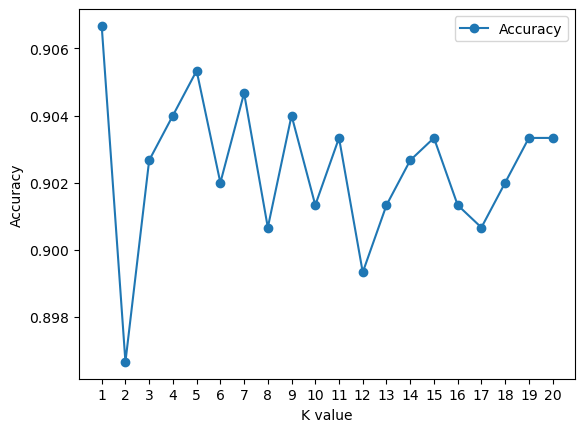

In [137]:
# e) For K-NN classification, fit and test the model for different values for K (from 1 to 20) using a for loop and record and plot the KNN’s testing accuracy in a variable (scores).
import matplotlib.pyplot as plt
import numpy as np


scores_knn = []
x_number = np.arange (1,21,1)

for n_number in range (20):
    knn = KNeighborsClassifier(n_neighbors=n_number+1)
    knn.fit (X_train, Y_train)
    scores_knn.append (knn.score(X_test, Y_test))

y_number = np.array (scores_knn)

plt.plot (x_number, y_number,marker='o', label='Accuracy')
plt.xlabel ('K value')
plt.ylabel ('Accuracy')
plt.xticks(x_number, x_number)
plt.legend ()
plt.show ()

Accuracy and F1 score: 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1402
           1       0.36      0.59      0.45        98

    accuracy                           0.91      1500
   macro avg       0.67      0.76      0.70      1500
weighted avg       0.93      0.91      0.92      1500

Confuison matrix: 
 [[1300  102]
 [  40   58]] 

Compare with hw4:


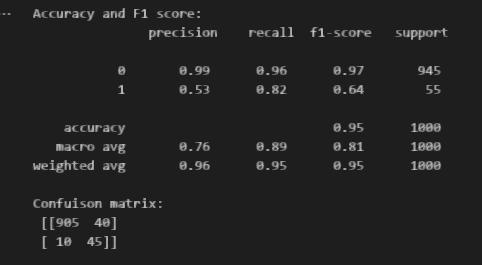

In [138]:
# f) Compare the performances (test accuracies and confusion matrices) of Logistic Regression (in HW4) and KNN classifiers and show the result.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print ('Accuracy and F1 score: \n', classification_report (knn_E.predict(X_test), Y_test))

print ('Confuison matrix: \n', confusion_matrix (knn_E.predict(X_test), Y_test),'\n')


print ('Compare with hw4:')
from IPython import display
display.Image('D:\hw4_score.png')

In [139]:
#Q2
# a) Read the data set as Pandas Dataframe object and consider the columns: Gender, Married, Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area as feature input (X) and Loan_Status as Label output (Y)
url = 'https://github.com/lc0312/COSC502/blob/main/Customer.csv?raw=true'
Customer_df = pd.read_csv(url)

output_data = Customer_df['Loan_Status']
input_data = Customer_df[['Gender', 'Married','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]

In [149]:
# b) Perform the necessary conversion (Label encoding and may be feature scaling) of appropriate features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#input_data = pd.get_dummies(data=input_data, columns=['Gender', 'Married', 'Education', 'Property_Area'])

for col in ('Gender', 'Married', 'Education', 'Property_Area'):
    input_data[col] = le.fit_transform(input_data[col])

print ('For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet') 

print (input_data)

For this imple question due to the low load of work, I do not use feature scaling, becasue numbers are not complex yet
     Gender  Married  Education  ApplicantIncome  CoapplicantIncome  \
0         1        1          0             4583             1508.0   
1         1        1          0             3000                0.0   
2         1        1          1             2583             2358.0   
3         1        0          0             6000                0.0   
4         1        1          1             2333             1516.0   
..      ...      ...        ...              ...                ...   
376       1        1          0             5703                0.0   
377       1        1          0             3232             1950.0   
378       0        0          0             2900                0.0   
379       1        1          0             4106                0.0   
380       0        0          0             4583                0.0   

     LoanAmount  Loan_Amount

C:\Users\try\AppData\Local\Temp\ipykernel_7944\2356211934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = le.fit_transform(input_data[col])
C:\Users\try\AppData\Local\Temp\ipykernel_7944\2356211934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data[col] = le.fit_transform(input_data[col])
C:\Users\try\AppData\Local\Temp\ipykernel_7944\2356211934.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
# c) Classify the data set (20% test, 80% training) using Decision Tree and Random Forest classifier

from sklearn import tree

X_train, X_test, Y_train, Y_test = train_test_split (input_data, output_data, test_size=0.2)

dt = tree.DecisionTreeClassifier()
dt.fit (X_train, Y_train)


ValueError: Input X contains NaN.
DecisionTreeClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values